1. Exploratory Data Analysis (EDA)
Import Libraries, Load Dataset, Exploring Data

i. Import Libraries

*ii. Ingest Data *

iii. Explore Data

iv. Outlier Detection

v. Drop unnecessary features

In [1]:
import pandas as pd

df_female = pd.read_csv('../data/ANSUR II FEMALE Public.csv')


In [2]:
df_male = pd.read_csv('../data/ANSUR II MALE Public.csv',encoding='latin-1')

In [3]:
# sys.path.append('../models')
df_male.shape

(4082, 108)

In [4]:
df_female.shape

(1986, 108)

In [5]:
df = pd.concat([df_male, df_female], axis=0, ignore_index=True)
df.head(10)

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,...,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,...,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,...,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,...,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,...,92G,North Carolina,2,NaN,2,21,77,213,Right hand,NaN
5,10115.0,263,1407,344,216,1293,228,184,404,340,...,91L,Kentucky,1,NaN,1,39,69,175,Right hand,NaN
6,10117.0,314,1476,343,257,1378,280,207,453,452,...,91D,Mississippi,2,NaN,2,32,72,250,Right hand,NaN
7,10237.0,304,1529,360,254,1402,247,206,425,332,...,88M,Romania,1,NaN,1,23,74,211,Right hand,NaN
8,10242.0,321,1457,339,230,1345,257,198,415,379,...,92F,Arkansas,1,NaN,1,36,70,220,Right hand,NaN
9,10244.0,227,1481,345,233,1372,264,204,406,325,...,25L,Maryland,1,NaN,1,23,72,160,Left hand,NaN


In [6]:
# Find out Columns that Have NaN values
# dfn = df.loc[:,df.isnull().any()]
# dfn

In [7]:
null_values = [col for col in df.columns if df[col].isnull().any()]
null_values

['subjectid', 'Ethnicity', 'SubjectId']

In [8]:
df =df.drop(null_values,axis=1)


In [9]:
df.isnull().sum()


abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
                                 ..
DODRace                           0
Age                               0
Heightin                          0
Weightlbs                         0
WritingPreference                 0
Length: 106, dtype: int64

In [10]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,Right hand


In [11]:
df_cat.isnull().sum()

Gender                   0
Date                     0
Installation             0
Component                0
Branch                   0
PrimaryMOS               0
SubjectsBirthLocation    0
WritingPreference        0
dtype: int64

In [12]:
df_cat.nunique()

Gender                     2
Date                     253
Installation              12
Component                  3
Branch                     3
PrimaryMOS               285
SubjectsBirthLocation    152
WritingPreference          3
dtype: int64

In [13]:
for c in df:
    print(f"{c} : {len(df[c].value_counts())}")


abdominalextensiondepthsitting : 218
acromialheight : 432
acromionradialelength : 133
anklecircumference : 112
axillaheight : 402
balloffootcircumference : 107
balloffootlength : 86
biacromialbreadth : 169
bicepscircumferenceflexed : 237
bicristalbreadth : 132
bideltoidbreadth : 244
bimalleolarbreadth : 37
bitragionchinarc : 107
bitragionsubmandibulararc : 125
bizygomaticbreadth : 50
buttockcircumference : 429
buttockdepth : 161
buttockheight : 322
buttockkneelength : 209
buttockpopliteallength : 185
calfcircumference : 196
cervicaleheight : 452
chestbreadth : 131
chestcircumference : 521
chestdepth : 162
chestheight : 421
crotchheight : 318
crotchlengthomphalion : 273
crotchlengthposterioromphalion : 180
earbreadth : 22
earlength : 36
earprotrusion : 22
elbowrestheight : 176
eyeheightsitting : 237
footbreadthhorizontal : 49
footlength : 106
forearmcenterofgriplength : 143
forearmcircumferenceflexed : 169
forearmforearmbreadth : 335
forearmhandlength : 181
functionalleglength : 383
han

In [14]:
df.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.00000,6068.000000,6068.000000,6068.000000,6068.000000,...,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,246.468688,1406.161338,327.374423,224.891397,1299.608767,244.19265,194.754614,399.204186,340.934245,274.735003,...,377.003790,1031.501154,797.093935,169.002966,830.059987,17.515326,1.615030,29.761206,68.257251,174.749670
std,37.400106,79.091048,20.720018,16.051833,72.022286,16.84502,13.516368,30.236914,41.519866,19.221034,...,31.617723,62.702388,156.528164,13.124513,47.650519,550.949948,0.979156,8.674650,3.861954,33.691952
min,155.000000,1115.000000,249.000000,156.000000,1038.000000,186.00000,151.000000,283.000000,216.000000,197.000000,...,289.000000,805.000000,358.000000,124.000000,672.000000,1.000000,1.000000,17.000000,56.000000,0.000000
25%,219.000000,1350.000000,313.000000,214.000000,1249.000000,232.00000,185.000000,376.000000,311.000000,262.000000,...,355.000000,988.000000,682.000000,159.000000,797.000000,1.000000,1.000000,23.000000,66.000000,150.000000
50%,242.000000,1410.000000,328.000000,225.000000,1302.000000,245.00000,195.000000,404.000000,341.000000,274.000000,...,375.000000,1033.000000,785.000000,170.000000,830.000000,1.000000,1.000000,28.000000,68.000000,173.000000
75%,271.000000,1462.000000,341.250000,235.000000,1349.000000,256.00000,204.000000,421.000000,370.000000,288.000000,...,398.000000,1076.000000,896.000000,179.000000,863.000000,2.000000,2.000000,36.000000,71.000000,196.000000
max,451.000000,1683.000000,393.000000,293.000000,1553.000000,306.00000,245.000000,489.000000,490.000000,362.000000,...,494.000000,1245.000000,1442.000000,216.000000,1009.000000,42351.000000,8.000000,58.000000,94.000000,321.000000


In [15]:
# In this machine learning project, I used the ANSUR II dataset to predict the DODRace
# column using Logistic Regression, Support Vector Machine, XGBoost, and Random Forest algorithms. I have applied SMOTE method to handle class imbalance and used SHAP to interpret the models.
df.DODRace.unique()


array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

<Axes: xlabel='DODRace', ylabel='Count'>

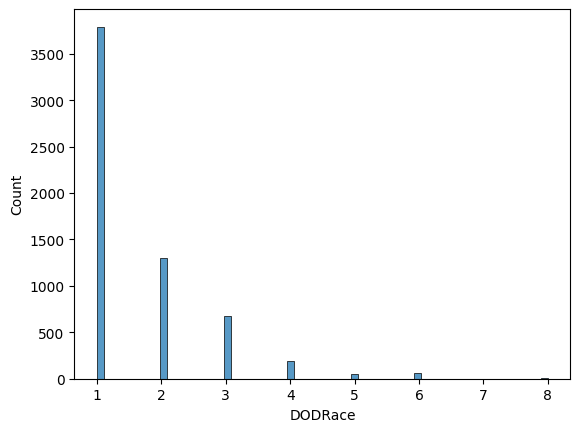

In [16]:
import seaborn as sns
sns.histplot(df['DODRace'])

In [17]:
#- Drop unnecessary colums
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,Regular Army,Combat Arms,19D,North Dakota,1,1,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,Regular Army,Combat Support,68W,New York,1,1,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,Regular Army,Combat Support,68W,New York,2,2,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,Regular Army,Combat Service Support,88M,Wisconsin,1,1,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,Regular Army,Combat Service Support,92G,North Carolina,2,2,21,77,213,Right hand


In [18]:
# Drop unnecessary colums
df[["DODRace","SubjectNumericRace"]]


,DODRace,SubjectNumericRace
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
...,...,...
6063,3,3
6064,3,3
6065,2,2
6066,3,3


In [19]:
df.drop(columns=['Date','Installation','Component','Branch', 'PrimaryMOS',	'SubjectsBirthLocation'], inplace=True)


In [20]:
# Here we have 2 columns have the same values we will drop one of thim
df.drop(['SubjectNumericRace'],axis=1, inplace = True)

In [21]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,...,1054,815,175,853,Male,1,41,71,180,Right hand
1,233,1395,326,220,1293,245,193,394,338,257,...,1054,726,167,815,Male,1,35,68,160,Left hand
2,287,1430,341,230,1327,256,196,427,408,261,...,1041,929,180,831,Male,2,42,68,205,Left hand
3,234,1347,310,230,1239,262,199,401,359,262,...,968,794,176,793,Male,1,31,66,175,Right hand
4,250,1585,372,247,1478,267,224,435,356,263,...,1245,946,188,954,Male,2,21,77,213,Right hand


In [22]:
# Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)
df['DODRace'].value_counts()

DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64

In [58]:
# df['DODRace'].isin([1,2,3])


In [53]:
race_below = df['DODRace'].value_counts()[df['DODRace'].value_counts()>500].index
race_below

Index([1, 2, 3], dtype='int64', name='DODRace')

In [56]:
df = df[df['DODRace'].isin(race_below)] # isin() كانه يقول لازم يكون نفس الي بين قوسين
df['DODRace'].value_counts()

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [57]:
df['DODRace'].value_counts()

DODRace
1    3792
2    1298
3     679
Name: count, dtype: int64

In [63]:
df['DODRace']

0       1
1       1
2       2
3       1
4       2
       ..
6063    3
6064    3
6065    2
6066    3
6067    3
Name: DODRace, Length: 5769, dtype: int64

In [66]:
df.shape

(5769, 99)

Outlier Detection

In [65]:
%store df

Stored 'df' (DataFrame)


In [29]:
# cont_table = pd.crosstab(df['DODRace'], df['WritingPreference'])
# cont_table

In [30]:
# from scipy import stats


# chi, p_val,_,_ = stats.chi2_contingency(cont_table)
# chi, p_val,_,_

In [31]:
# print(p_val)
# alpha = 1
# if p_val < alpha:
#     print('neccasseray column ,The variable may containe useful information for analysis ')
# else:
#     print('unneccasseray column ')
# print(p_val)


In [32]:
# since 
# p-value > alpha 

# Therefore, we accept H0, which shows that our variables do not have a significant relation.